In [14]:
import pandas as pd
from btc_data import BlockchaininfoData
import datetime
import numpy as np

In [15]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas import plotting

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, '_style'), '_get_standard_colors')(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)])
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

In [16]:
btc_database = BlockchaininfoData()

In [17]:
data = btc_database.data.copy()

In [18]:
data.columns

Index(['market_price', 'avg_block_size', 'n_transactions', 'mempool_size',
       'total_bitcoins', 'market_cap', 'trade_volume', 'blocks_size',
       'n_orphaned_blocks', 'n_transactions_per_block',
       'median_confirmation_time', 'hash_rate', 'difficulty', 'miners_revenue',
       'transaction_fees', 'transaction_fees_usd',
       'cost_per_transaction_percent', 'cost_per_transaction',
       'n_unique_addresses', 'n_transactions_total', 'transactions_per_second',
       'mempool_count', 'mempool_growth', 'utxo_count',
       'n_transactions_excluding_popular',
       'n_transactions_excluding_chains_longer_than_100', 'output_volume',
       'estimated_transaction_volume', 'estimated_transaction_volume_usd',
       'my_wallet_n_users'],
      dtype='object')

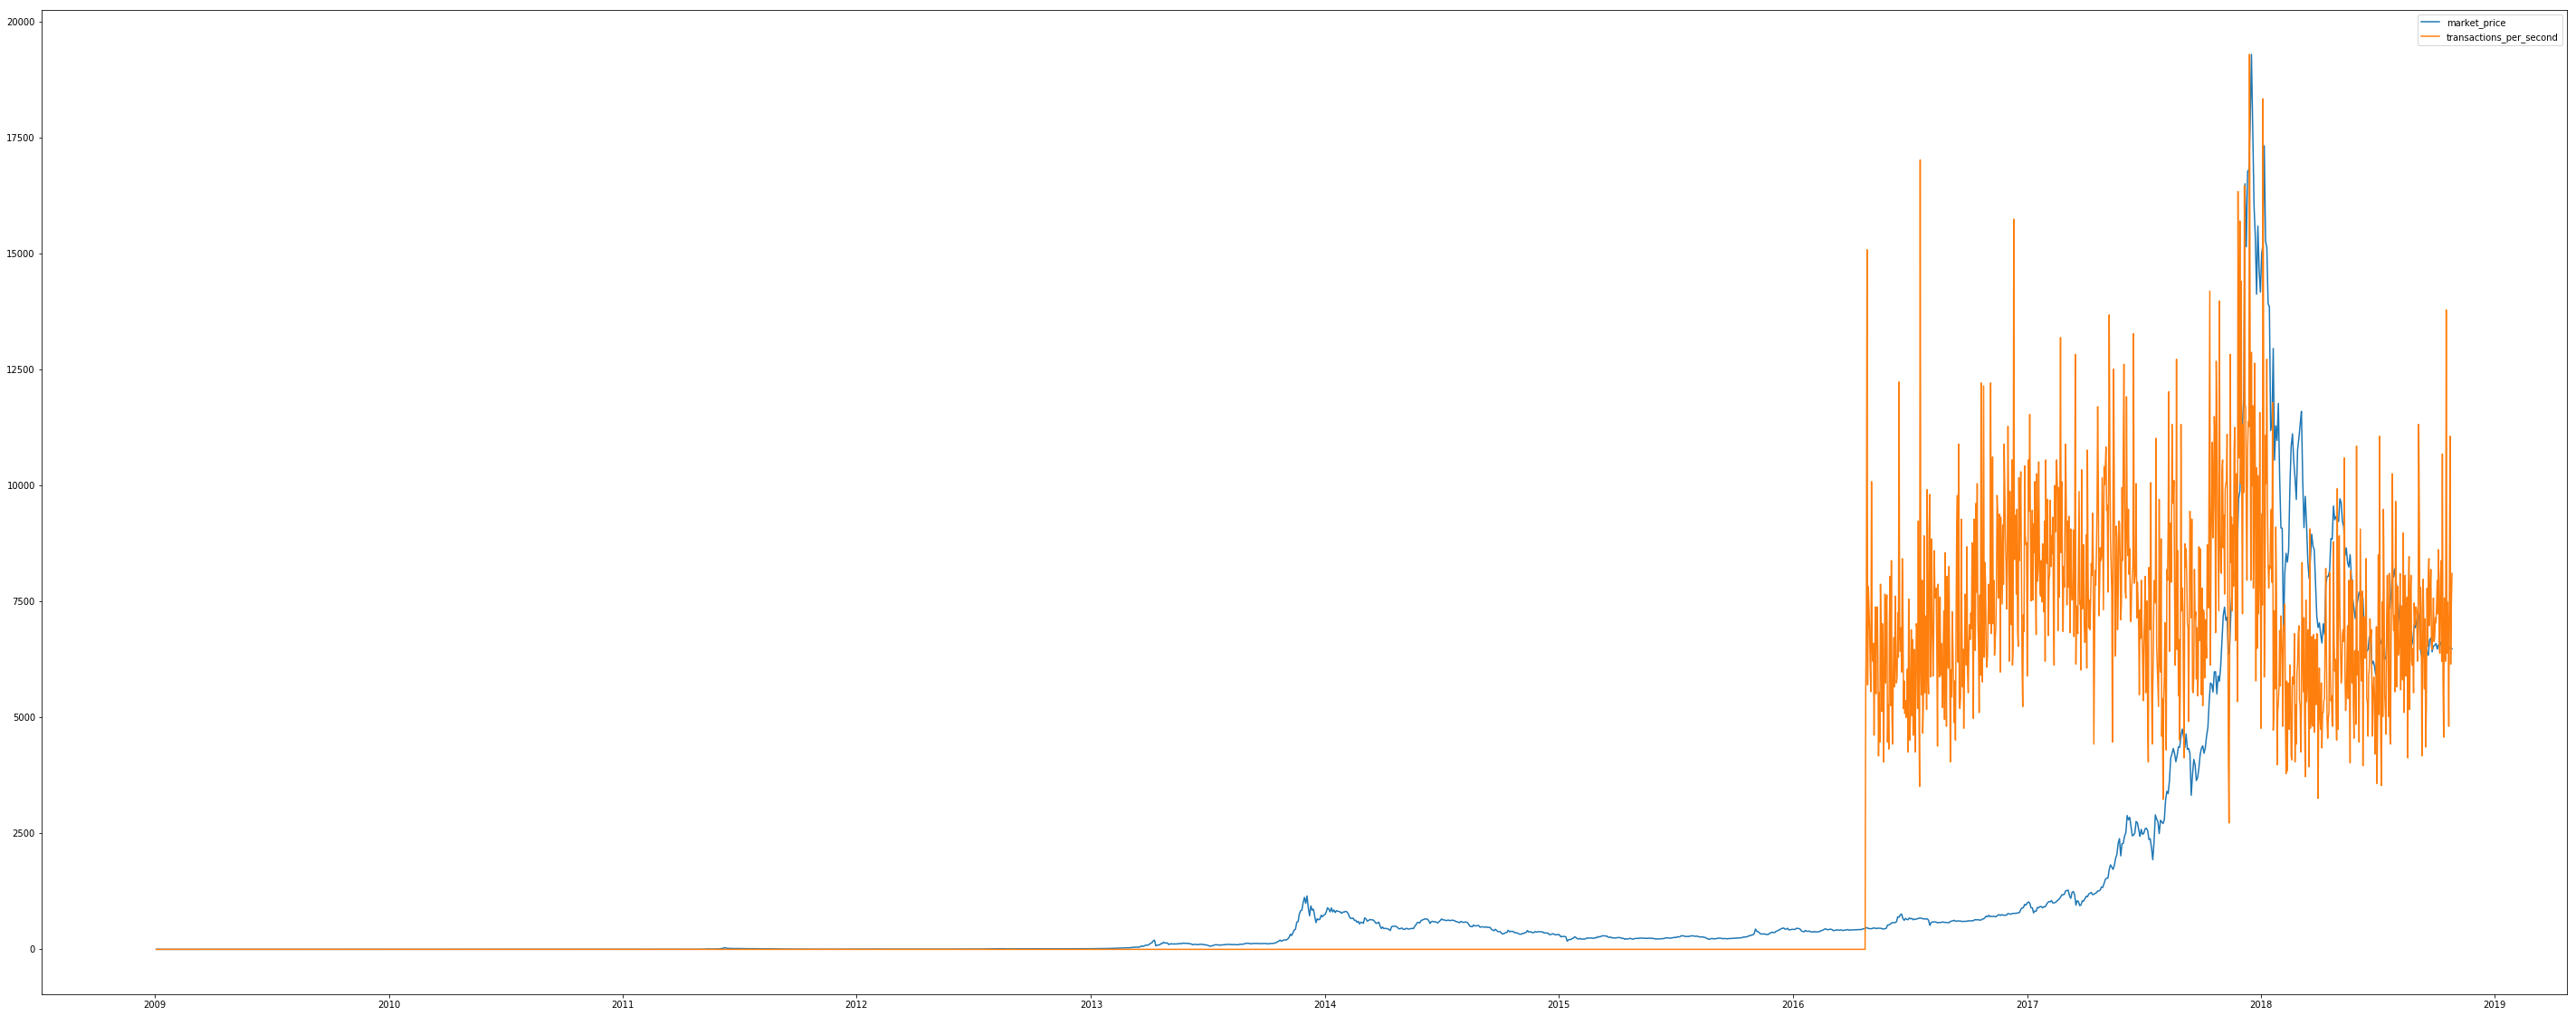

In [19]:
# df = data[(data.index < datetime.date(2016,5,1)) & (data.index > datetime.date(2015,12,1)) ][['output_volume', 'market_price']]
df = data.copy()[['market_price', 'transactions_per_second']]
# df['market_price'] = df['market_price'].apply(np.log)
# df['output_volume'] = df['output_volume'].apply(np.log)
df['transactions_per_second'] = df['transactions_per_second']*max(df['market_price'])/max(df['transactions_per_second'])
df.plot(figsize = (50,20))

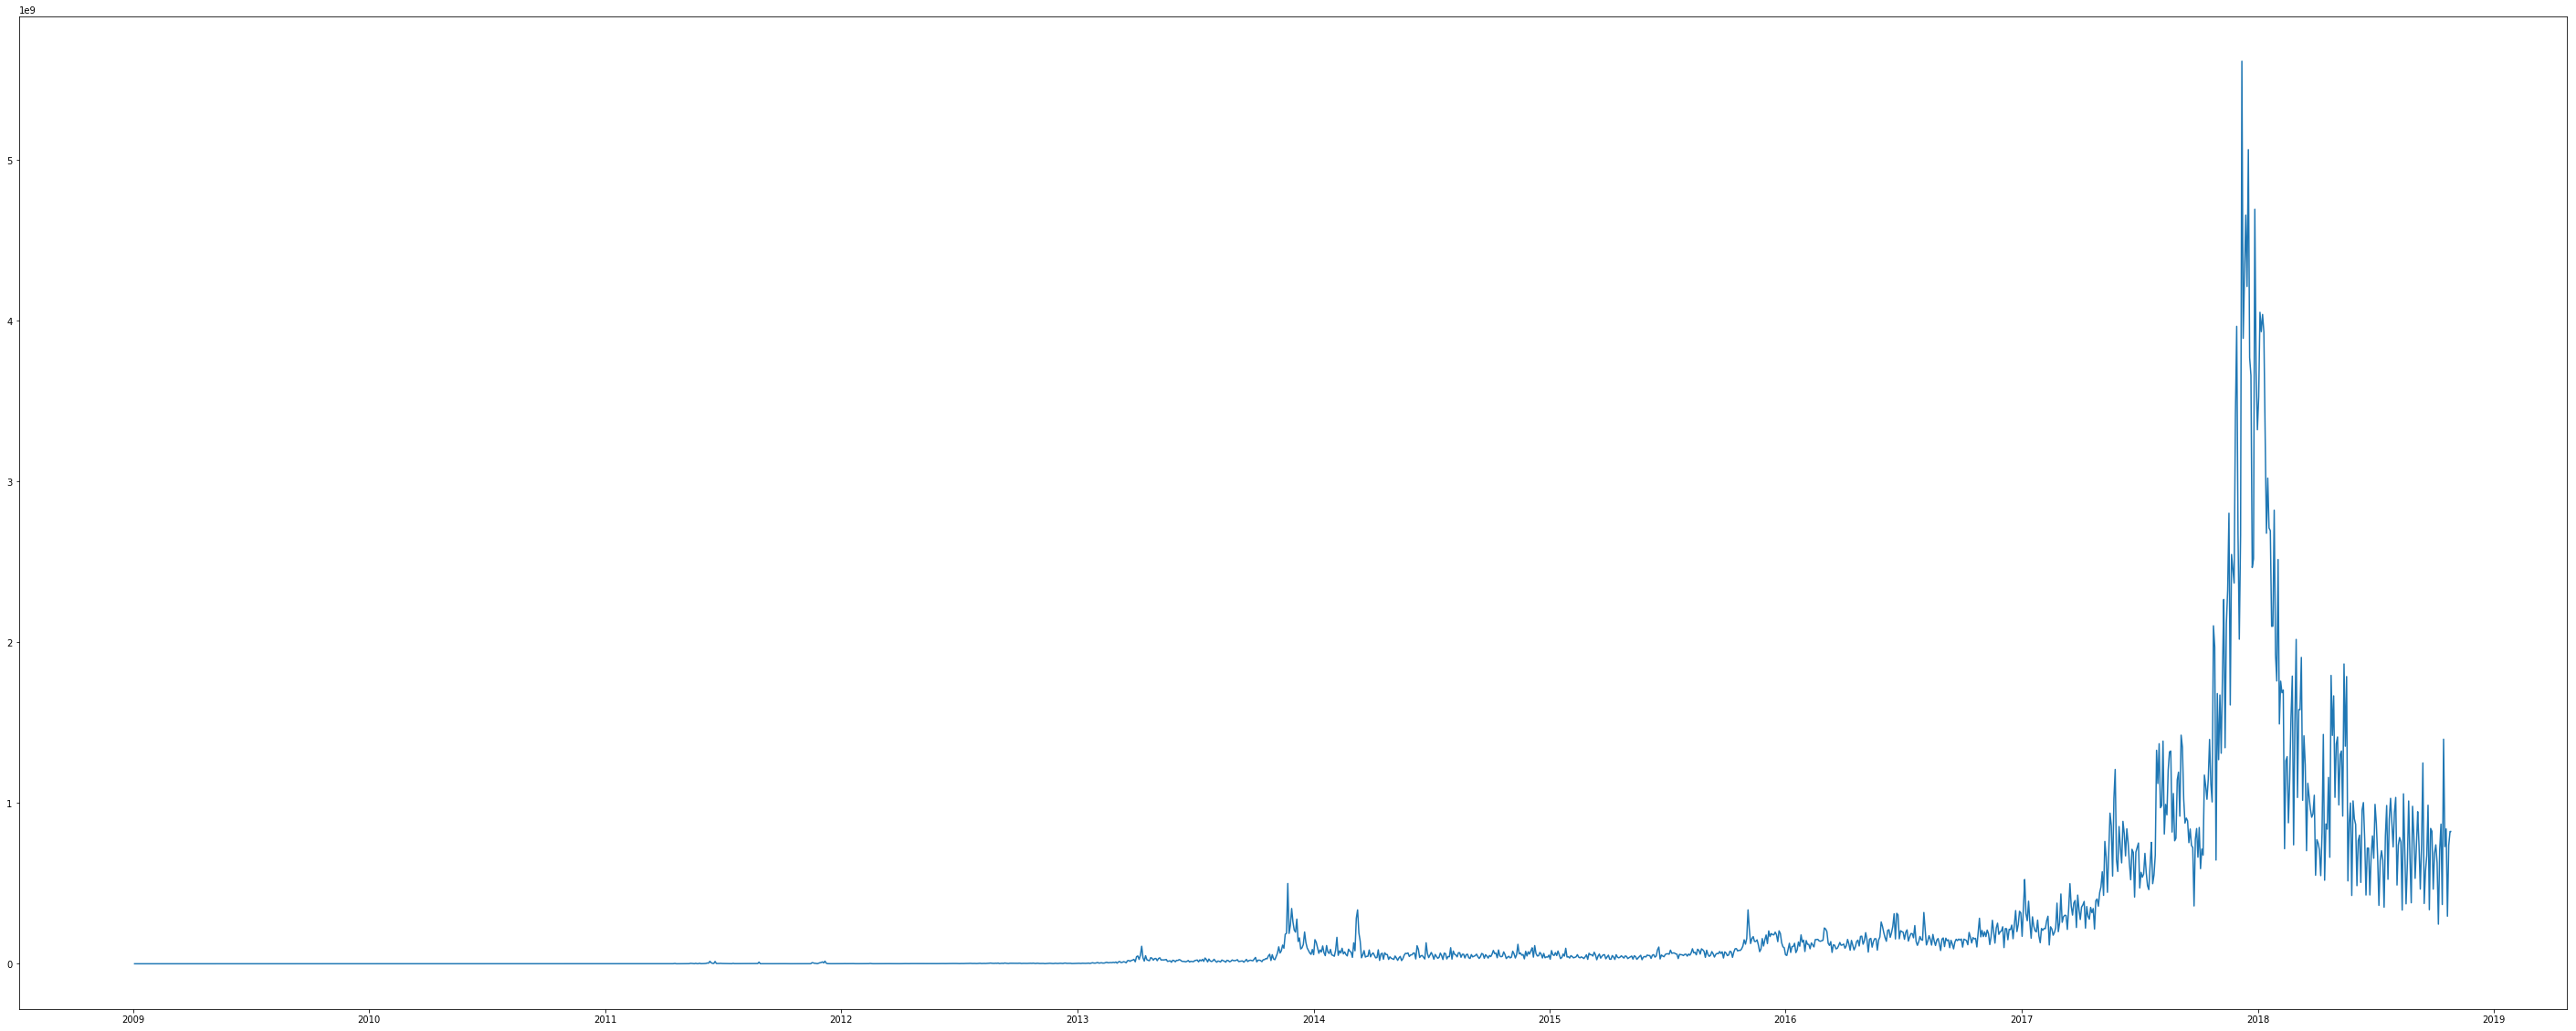

In [20]:
data['estimated_transaction_volume_usd'].plot(figsize = (50,20))

In [21]:
from bokeh.plotting import figure, output_file, show, output_notebook

In [22]:
output_notebook()

Loading BokehJS ...

In [23]:
p = figure(plot_width=1000, plot_height=600, y_axis_type='log', tools='pan, box_zoom, reset, save, lasso_select')

In [24]:
p.line(data.index, data.market_cap, color='red')
p.line(data.index, data.output_volume*max(data['market_cap'])/max(data['output_volume']))

GlyphRenderer(id='1175', ...)

In [25]:
show(p)